In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#url = 'http://github.com/DataQuests/Pandas/raw/master/categorized.csv'
#url = 'https://github.com/DataQuests/Pandas/raw/master/with_cpep.csv'
df = pd.read_csv("withRatio.csv")
col = ['age_bl', 'fma', 'ffma', 'bmi', '1 clinwt', 'GENDER', 'B meanwst', 'B meanumb', 'B pulse', 'B temp', 'B resp', 'B meansbp', 'B meandbp', 'B meanbp', 'B pulseprs',  'WhtR', 'AGE/BMI', 'AGE_WhtR']
X = df[col] 
y = df['cat ']

In [2]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=15)
fit = bestfeatures.fit(X,y)

In [3]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [4]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [5]:
featureScores

,Specs,Score
0,age_bl,3.114914
1,fma,3.133997
2,ffma,14.828534
3,bmi,0.297015
4,1 clinwt,4.478850
5,GENDER,13.237995
6,B meanwst,9.189179
7,B meanumb,5.327016
8,B pulse,0.530942
9,B temp,0.007058


In [6]:
print(featureScores.nlargest(15, 'Score')) #print 15 best features

         Specs      Score
2         ffma  14.828534
5       GENDER  13.237995
6    B meanwst   9.189179
7    B meanumb   5.327016
4     1 clinwt   4.478850
17    AGE_WhtR   3.929853
1          fma   3.133997
0       age_bl   3.114914
11   B meansbp   2.615113
13    B meanbp   1.639864
14  B pulseprs   1.567563
12   B meandbp   1.171847
8      B pulse   0.530942
3          bmi   0.297015
10      B resp   0.157960


# feature Importance

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

C:\Users\TENN\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                     oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [8]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.0353178  0.08681973 0.06416213 0.02370646 0.05296817 0.14697277
 0.05198669 0.08030298 0.06977039 0.08532814 0.02845005 0.04234096
 0.05471588 0.03678197 0.04876113 0.01872096 0.02086413 0.05202966]


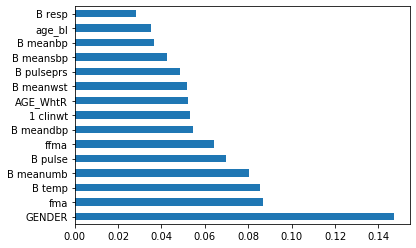

In [9]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()

# Correlation with heatmap

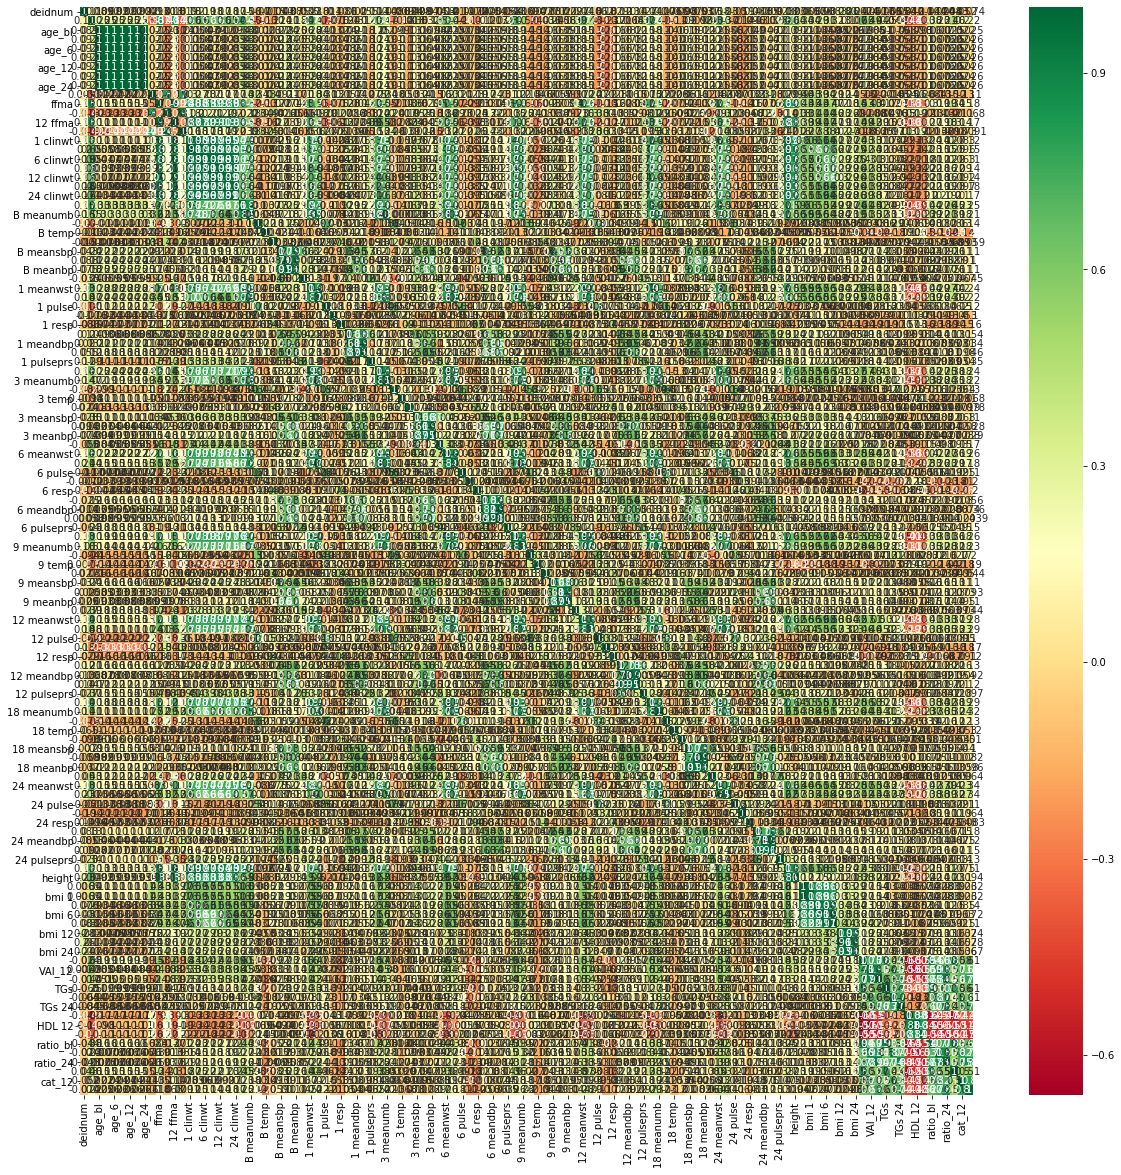

In [19]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")